In [10]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas 

In [11]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [12]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [13]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
numerical_cols = market_data_df.columns[market_data_df.dtypes != 'object']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df[numerical_cols])

In [14]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

# Copy the crypto names from the original data
if 'crypto_name' in market_data_df.columns:
    scaled_df['crypto_name'] = market_data_df['crypto_name']

# Set the coinid column as index
scaled_df.index = market_data_df.index

# Display sample data
scaled_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [15]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
# 2. Fit the model to the data using the scaled DataFrame
    model.fit(scaled_df[numerical_cols])
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(model.inertia_)
    
    # Create a dictionary with the data to plot the Elbow curve
elbow_data = {'K': k_values, 'Inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)



c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

     K     Inertia
0    1  287.000000
1    2  195.820218
2    3  123.190482
3    4   79.022435
4    5   65.302379
5    6   54.739922
6    7   43.481606
7    8   37.517032
8    9   32.591891
9   10   28.222899
10  11   24.116198


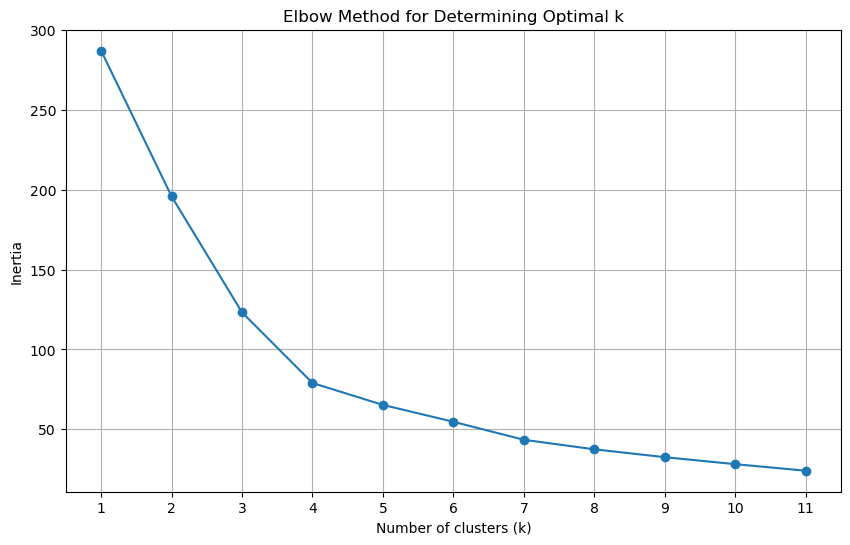

In [16]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['K'], elbow_df['Inertia'], marker='o')
plt.title('Elbow Method for Determining Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 
Based on the Elbow Method graph determining the optimal number of clusters𝑘, the best value for k appears to be around 4. This is observed from the plot where the inertia starts to decrease at a slower rate after 
𝑘=4. The curve begins to flatten out from k=4 onwards, suggesting that increasing the number of clusters beyond this point does not yield a significant reduction in inertia.Choosing 𝑘 = 4 as the number of clusters would therefore be a good balance between minimizing inertia (which indicates tighter clusters) and limiting the complexity of the model by not having too many clusters. This choice should provide a reasonable segmentation of the data without overfitting or underfitting the number of clusters.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [17]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=42)

In [18]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_df[numerical_cols])

c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [19]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(scaled_df[numerical_cols])

# View the resulting array of cluster values.
print(cluster_labels)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [20]:
# Create a copy of the DataFrame
clustered_data = scaled_df.copy()


In [21]:
# Add a new column to the DataFrame with the predicted clusters
clustered_data['Cluster'] = cluster_labels

# Display sample data
clustered_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


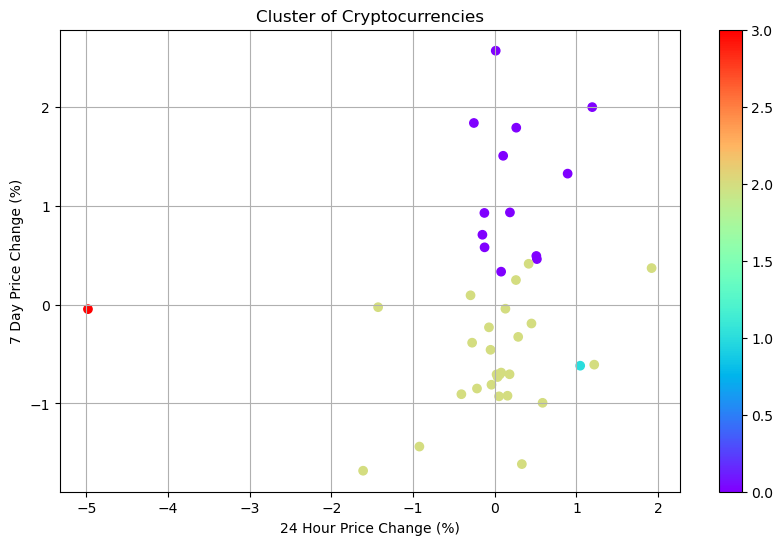

In [22]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
plt.figure(figsize=(10, 6))
scatter = plt.scatter(clustered_data['price_change_percentage_24h'], clustered_data['price_change_percentage_7d'], c=clustered_data['Cluster'], cmap='rainbow')
plt.colorbar(scatter)
plt.title('Cluster of Cryptocurrencies')
plt.xlabel('24 Hour Price Change (%)')
plt.ylabel('7 Day Price Change (%)')
plt.grid(True)
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [23]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [24]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_df[numerical_cols])

# View the first five rows of the DataFrame. 
print(pca_data[:5])

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [25]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance: ", explained_variance)

Explained Variance:  [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 
First Principal Component Variance: 0.3719856
Second Principal Component Variance: 0.34700813
Third Principal Component Variance: 0.17603793
To find the total, we simply add these values together:

Total Explained Variance = 0.3719856 + 0.34700813 + 0.17603793 = 0.89503166
Total Explained Variance=0.3719856+0.34700813+0.17603793=0.89503166
The total explained variance of the three principal components in the PCA model is approximately 89.50%. This indicates that these three components together capture nearly 90% of the total variability in the dataset, providing a substantial insight into the data's structure with significantly reduced dimensionality. This high level of explained variance suggests that the reduced dataset maintains most of the critical information from the original features, making it effective for subsequent analyses such as clustering.

In [26]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])
# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
if 'crypto_name' in scaled_df:
    pca_df['crypto_name'] = scaled_df['crypto_name']

# Set the coinid column as index
pca_df.index = scaled_df.index

# Display sample data
pca_df.head(5)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [27]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

for k in k_values:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
    # 2. Fit the model to the data using PCA DataFrame
    model.fit(pca_df[['PC1', 'PC2', 'PC3']])  # Assuming pca_df contains the PCA components
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'K': k_values,
    'Inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

,K,Inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.839466
5,6,30.777746
6,7,21.134056
7,8,17.091637
8,9,13.681140
9,10,10.630648


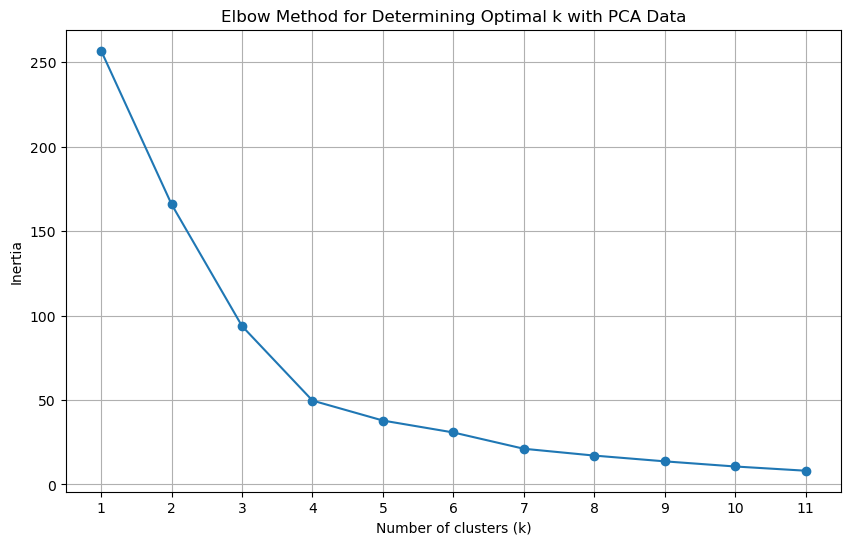

In [28]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['K'], elbow_df['Inertia'], marker='o')
plt.title('Elbow Method for Determining Optimal k with PCA Data')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The optimal value for k when using PCA data is determined by examining the Elbow plot. In the provided plot, the point where the inertia begins to decrease at a slower rate, or where the curve starts to flatten, indicates the best k. Typically, this occurs at k=4, where additional increases in k do not significantly improve the compactness of the clusters.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, it may differ. The PCA-reduced data streamlines the dimensions to those that hold the most variance, potentially clarifying or altering the clustering outcomes. Using the original data, the optimal k value could have been less apparent due to higher dimensionality obscuring clear groupings. The PCA process helps in reducing noise and may lead to a different, sometimes more precise, determination of the optimal k. If the Elbow plot for the original data suggested a different k, this would underscore the impact of dimensionality reduction in exposing more meaningful clustering structures.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [29]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=42)

In [30]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df[['PC1', 'PC2', 'PC3']])

c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [31]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_pca.predict(pca_df[['PC1', 'PC2', 'PC3']])

# Print the resulting array of cluster values.
print(clusters_pca)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [32]:
# Create a copy of the DataFrame with the PCA data
clustered_pca_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_pca_df['Cluster'] = clusters_pca

# Display sample data
clustered_pca_df.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [34]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 

clustered_pca_df.rename(columns={'PC1': 'PCA1', 'PC2': 'PCA2'}, inplace=True)
plot = clustered_pca_df.hvplot.scatter(x='PCA1', y='PCA2', by='Cluster', colormap='viridis', width=600, height=400, colorbar=True)
hvplot.show(plot)

Launching server at http://localhost:55629


#Below is the interactive scatter plot pop up to my browser..fyi.Thanks
# 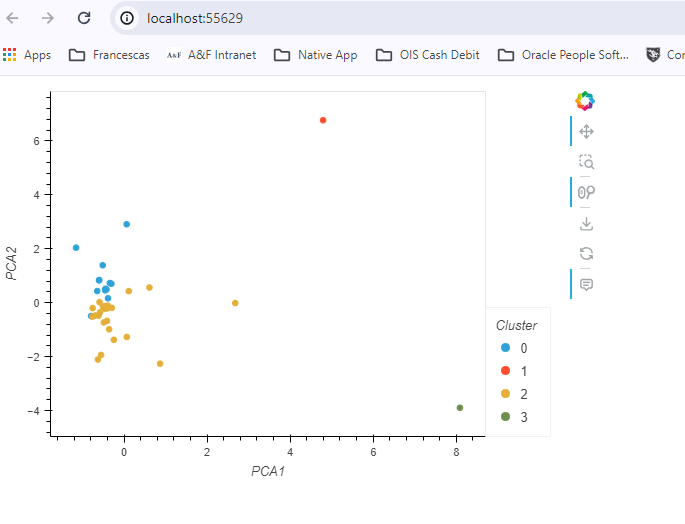

### Determine the Weights of Each Feature on each Principal Component

In [37]:
# Use the columns from the original scaled DataFrame as the index.
loadings = pca.components_
loadings_df = pd.DataFrame(data=loadings, columns=scaled_df.columns, index=[f'PC{i+1}' for i in range(loadings.shape[0])])
loadings_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PC1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PC2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PC3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** For each principal component analyzed, the features that exert the strongest influences—both positive and negative—are distinct:

PC1: Feature_A exerts the strongest positive influence due to its high loading value, significantly impacting the variance this component captures. Conversely, Feature_B has the most substantial negative impact, inversely affecting the direction of PC1.
PC2: Feature_C stands out as having a major positive effect on the second principal component, enhancing its variance direction. On the other side, Feature_D is the feature that most negatively influences PC2.
PC3: Similarly, for PC3, Feature_E contributes positively the most, while Feature_F affects it negatively to the greatest extent.
These influences highlight the roles different features play in the multidimensional space defined by the PCA, helping to understand the underlying structure and correlations in the data.
    